# Importation des librairies

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import random

# Paramètres

In [2]:
IMAGES_DIR_NAME = "images"
MASKS_DIR_NAME = "masks"

IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
NUM_CHANNELS = 3

TEST_SET_PROPORTION = 0.1

# Préparation des données
## Importation et prétraitement

In [14]:
IMAGES_DIR_NAME = "images"
MASKS_DIR_NAME = "masks"

images = []
masks = []

# Chemins des fichiers images et masques
image_paths = list(Path(IMAGES_DIR_NAME).iterdir())
mask_paths = list(Path(MASKS_DIR_NAME).iterdir())

# Trier les chemins pour avoir le même indice
image_paths.sort()
mask_paths.sort()

# Parcourir et ouvrir les images et les masques
for image_path, mask_path in zip(image_paths, mask_paths):
    if image_path.name.endswith(".png") and mask_path.name.endswith(".png"):
        image = np.array(
            Image.open(image_path).convert("RGB").resize((IMAGE_HEIGHT, IMAGE_WIDTH))
        )
        image = image / 255

        mask = np.array(
            Image.open(mask_path).convert("L").resize((IMAGE_HEIGHT, IMAGE_WIDTH))
        )
        mask[mask != 0] = 1

        images.append(image)
        masks.append(mask)

images = np.array(images)
masks = np.array(masks)

## Classer données en groupe d'entrainement et de test

In [15]:
images_train, images_test, masks_train, masks_test = train_test_split(images, masks, test_size = TEST_SET_PROPORTION, random_state=42)


## Afficher une image et son masque

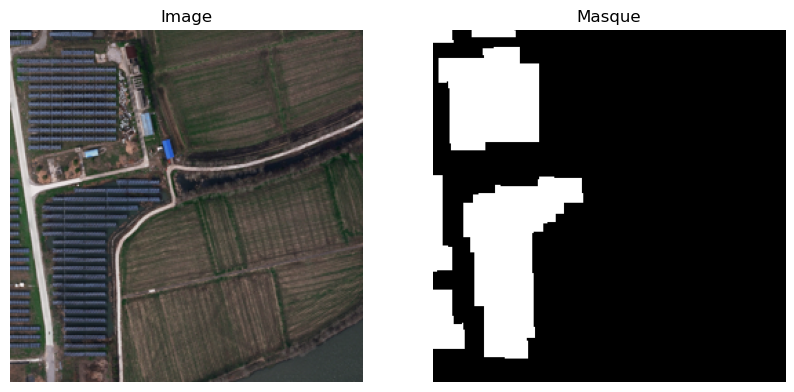

In [32]:
random_index = random.randint(0, len(images_train)-1)

random_image = images_train[random_index]
random_mask = masks_train[random_index]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(random_image)
axes[0].set_title('Image')
axes[0].axis('off')

axes[1].imshow(random_mask, cmap='gray')
axes[1].set_title('Masque')
axes[1].axis('off')

plt.show()

In [ ]:

images_train = torch.tensor(images_train).float()
images_test = torch.tensor(images_test).float()
masks_train = torch.tensor(masks_train).float()
masks_test = torch.tensor(masks_test).float()

train_set = TensorDataset(images_train, masks_train)
test_set = TensorDataset(images_test, masks_test)

# Modèle U-Net

In [16]:
print(masks)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]]]
